This will be the first study for the dataset which we have just extracted.
In this work, we begin with a Feature Extractor model. Also, we will be using Clustering Algorihtm with
~ Melih Kaçaman - 12/12/2022

# Creating Models Using Keras Functional API

In [1]:
SHAPE_WITH_CHANNELS = (224, 224, 3)
SHAPE = (224, 224)

In [2]:
import tensorflow as tf 

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
# I'm not going to fine-tune this model.
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=SHAPE_WITH_CHANNELS, name='input_layer')
x = base_model(inputs)
outputs = tf.keras.layers.GlobalAvgPool2D(name='global_average_pooling_layer')(x)

model_0 = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 4s 0us/step


In [3]:
img_to_array_custom = tf.keras.preprocessing.image.img_to_array
load_img_custom = tf.keras.preprocessing.image.load_img

In [5]:
import tensorflow_hub as hub
import numpy as np

def get_embeddings_img(path):
    model = hub.KerasLayer('https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2')
    image = load_img_custom(path, target_size=SHAPE)
    image = img_to_array_custom(image)
    image = np.expand_dims(image, axis=0)

    embeddings = model(image)

    return embeddings

In [40]:
# path = '../datasets/dataset_cv3/brand_08/1-0CD-VR029/2145.png'
# res2 = get_embeddings_img(path)
# res2.shape

TensorShape([1, 1280])

In [11]:
dir = '../datasets/dataset1/brand_08/all/'
data_tf = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir,
    image_size=(224, 224),
    label_mode=None,
    batch_size=32
)

Found 242 files belonging to 1 classes.


- Embeddings shapes are correct, so we can move on with tensorflow batch-dataset.

In [20]:
ds = data_tf.unbatch()
images = ds = list(ds.map(lambda x: x)) 

In [ ]:
# ds = data_tf.unbatch()
# images = list(ds.map(lambda x, y: x))
# labels = list(ds.map(lambda x, y: y)) 

# len(images), len(labels)

In [22]:
from sys import getsizeof 

getsizeof(images)

2200

In [ ]:
labels[0]

In [45]:
labels = np.array(labels)

In [24]:
images = np.array(list(map(lambda image: image.numpy().reshape(224, 224, 3), images)))

In [25]:
embeddings = model_0.predict(images)

8/8 [==============================] - 6s 616ms/step


In [48]:
images.shape, labels.shape, embeddings.shape

((1108, 224, 224, 3), (1108, 109), (1108, 1280))

# Cluestering 

## Model C_1 
- We will be dealing with the dataset that includes just extracted inputs using K-Means. 

In [27]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=10).fit(embeddings)
kmeans_model.labels_

array([8, 1, 6, 5, 0, 6, 2, 6, 7, 6, 3, 6, 3, 8, 6, 9, 4, 0, 2, 9, 8, 1,
       7, 7, 7, 7, 9, 5, 8, 3, 6, 6, 2, 0, 5, 4, 1, 6, 3, 0, 9, 1, 8, 4,
       6, 4, 9, 7, 2, 2, 7, 9, 7, 0, 8, 4, 9, 6, 2, 6, 8, 0, 2, 8, 4, 4,
       8, 6, 6, 9, 4, 6, 2, 1, 4, 8, 6, 9, 4, 0, 6, 9, 5, 4, 3, 1, 3, 6,
       9, 4, 4, 6, 5, 4, 6, 3, 6, 6, 8, 7, 4, 2, 7, 4, 4, 9, 4, 5, 6, 8,
       6, 8, 7, 8, 9, 2, 2, 9, 9, 9, 7, 5, 7, 7, 9, 7, 6, 6, 9, 6, 8, 6,
       6, 6, 8, 9, 7, 6, 0, 3, 6, 8, 9, 6, 5, 9, 0, 1, 9, 9, 2, 3, 4, 8,
       0, 7, 0, 6, 5, 1, 4, 6, 9, 6, 9, 9, 7, 3, 6, 8, 7, 9, 6, 9, 2, 5,
       2, 1, 8, 0, 6, 8, 3, 0, 4, 6, 4, 4, 1, 7, 8, 4, 8, 6, 3, 8, 6, 9,
       7, 1, 3, 9, 6, 6, 6, 6, 9, 6, 7, 4, 8, 5, 8, 3, 7, 8, 6, 6, 8, 6,
       3, 3, 1, 4, 8, 3, 2, 6, 6, 7, 4, 2, 4, 2, 2, 3, 6, 4, 9, 1, 1, 6])

In [28]:
len(set(kmeans_model.labels_))

10

In [30]:
kmeans_model.predict(embeddings[0, :].reshape(1, -1))

array([8])

In [31]:
kmeans_model.predict(embeddings[1, :].reshape(1, -1))

array([1])

### Model C_1: Visualization 

In [32]:
import pandas as pd 
unique, counts = np.unique(kmeans_model.labels_, return_counts=True)

val_counts = pd.DataFrame({'columns': unique, 'counts': counts})
val_counts.head() 

,columns,counts
0,0,13
1,1,14
2,2,18
3,3,18
4,4,29


In [33]:
np.mean(val_counts.counts)

24.2

In [47]:
val_counts[val_counts.counts == 14]

,columns,counts
1,1,14


In [35]:
clustering_result = pd.DataFrame({'cluster':kmeans_model.labels_})
clustering_result.head() 

,cluster
0,8
1,1
2,6
3,5
4,0


In [37]:
idxs = list(clustering_result[clustering_result.cluster == 3].index)
idxs

[10,
 12,
 29,
 38,
 84,
 86,
 95,
 139,
 151,
 167,
 182,
 194,
 200,
 213,
 220,
 221,
 225,
 235]

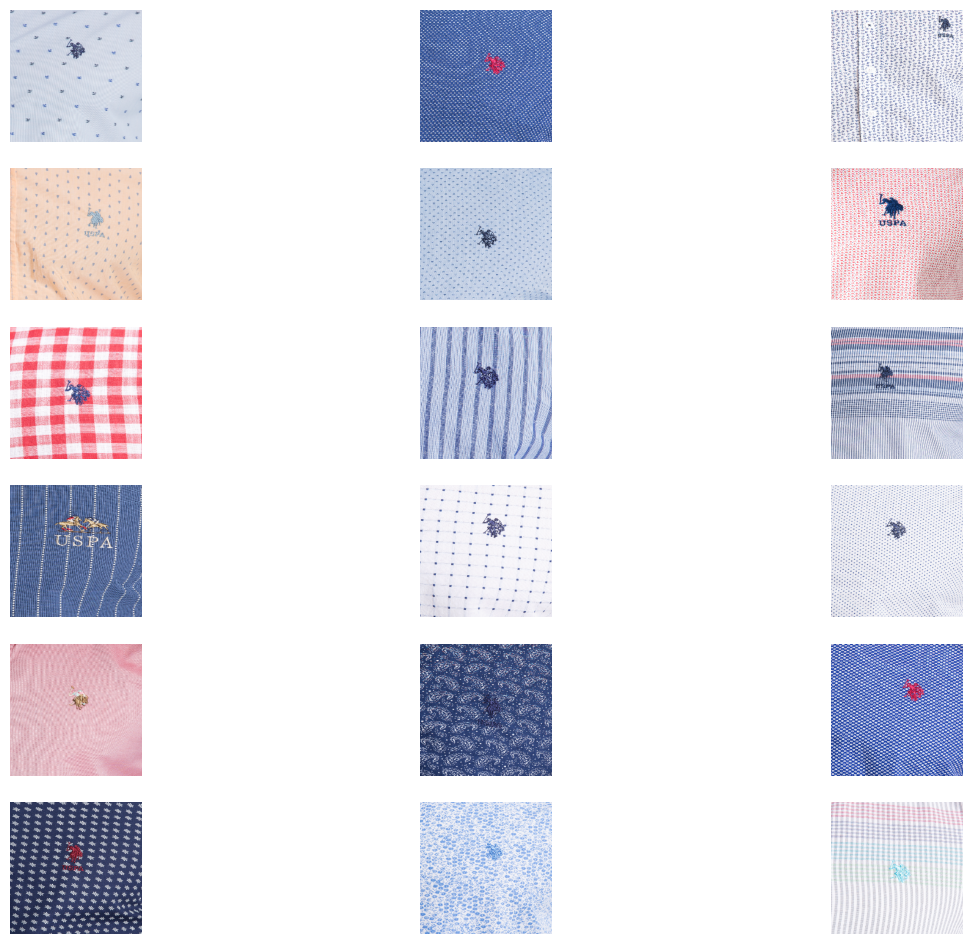

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_images(idxs, images, row = 1): 
    plt.figure(figsize=(15, 12))
    for i in range(len(idxs)):
        plt.subplot(row, 3, i+1)
        plt.axis('off')
        plt.imshow(np.array(images[idxs[i]], np.int32)) 

show_images(idxs, images, row=6)

In [43]:
idxs = list(clustering_result[clustering_result.cluster == 0].index)
idxs

[4, 17, 33, 39, 53, 61, 79, 138, 146, 154, 156, 179, 183]

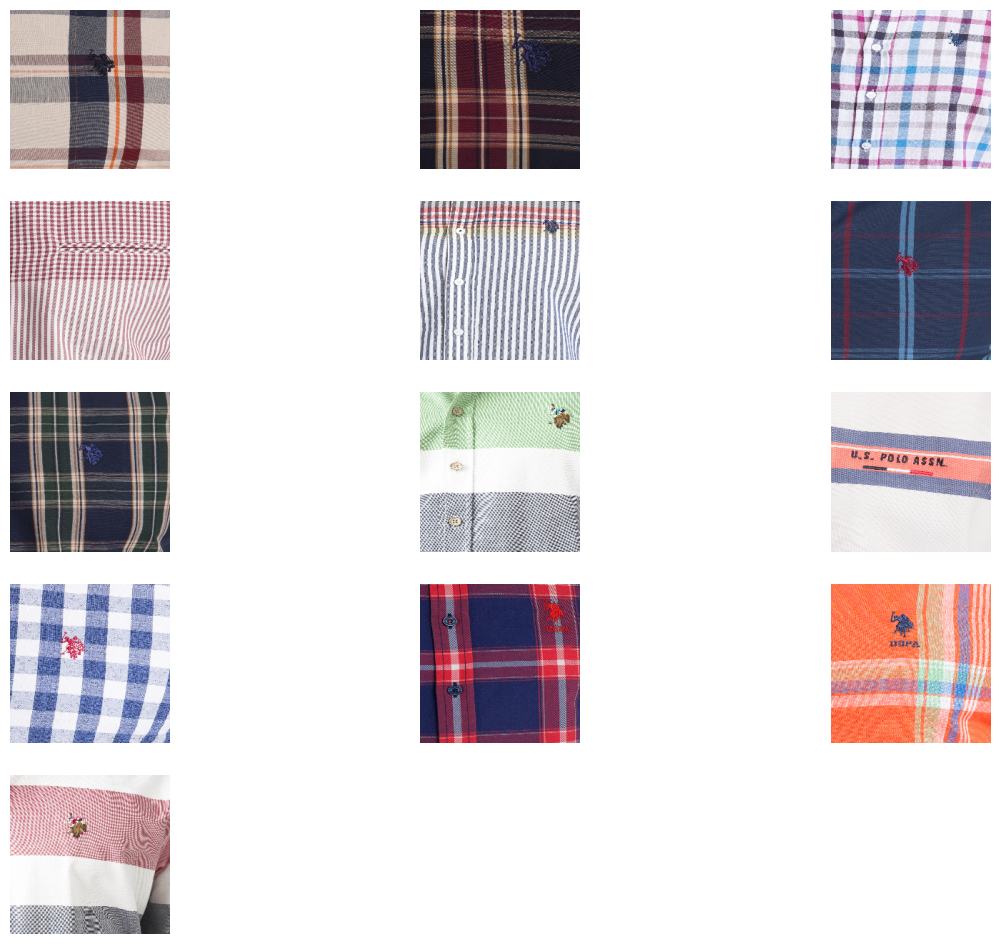

In [44]:
show_images(idxs, images, row = 5)

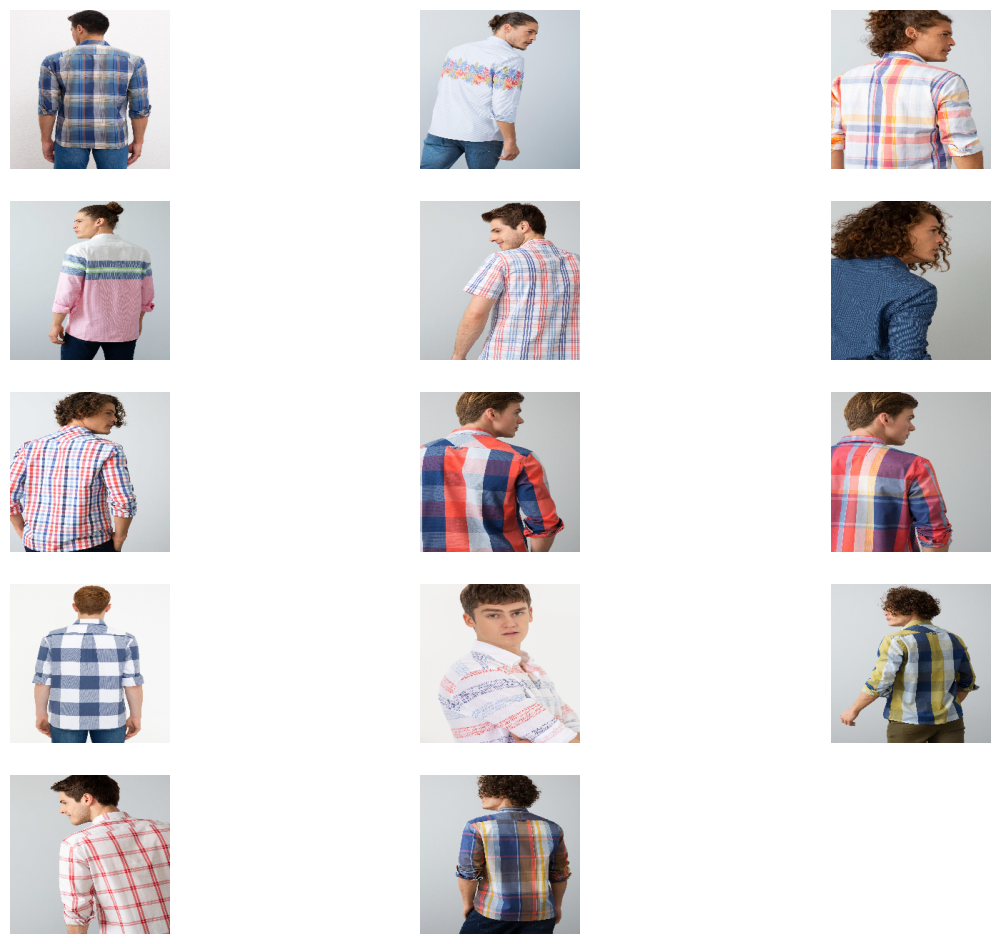

In [48]:
idxs = list(clustering_result[clustering_result.cluster == 1].index)
show_images(idxs, images, row = 5)

## Model C_2: Using Elbow Method  

In [70]:
from scipy.spatial.distance import cdist
K = range(20, len(labels)) 

distortions = []
inertias = []
mapping1 = {}
mapping2 = {} 

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(embeddings)
  
    distortions.append(sum(np.min(cdist(embeddings, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / embeddings.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(embeddings, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / embeddings.shape[0]
    mapping2[k] = kmeanModel.inertia_

KeyboardInterrupt: 